# CT Visualizaiton

In [12]:
%load_ext autoreload
%autoreload 2
from glob import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
import os 
from ctvis import * #'*'を指定した場合はprivate関数をコールすることはできない
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## データのpathをDataFrameにする

In [4]:
glob('public-covid-data/rp_im/*')

['public-covid-data/rp_im/1.nii.gz',
 'public-covid-data/rp_im/2.nii.gz',
 'public-covid-data/rp_im/3.nii.gz',
 'public-covid-data/rp_im/4.nii.gz',
 'public-covid-data/rp_im/5.nii.gz',
 'public-covid-data/rp_im/6.nii.gz',
 'public-covid-data/rp_im/7.nii.gz',
 'public-covid-data/rp_im/8.nii.gz',
 'public-covid-data/rp_im/9.nii.gz']

In [5]:
#DataFrame作成
#カラム:FilePathImage, Filename, FilePathMask
#DataFrame初期化
df_list = []
#フォルダパス取得
folder_path = glob('public-covid-data/*')

for p in folder_path:
    #配列初期化
    path_list =[] #フォルダ＋ファイル名リスト
    file_list =[] #ファイル名リスト
    #フォルダ内ファイルのリスト
    gz_files = glob(p+'/*')
    for file in gz_files:
        path_list.append(file) #フォルダ＋ファイル名
        file_list.append(os.path.split(file)[1]) #ファイル名

    #DataFrameに追加
    df_list.append(pd.DataFrame({'FilePath': path_list, 'FileName': file_list}))

#[0]に[1]をマージする
df = df_list[0].merge(df_list[1], on='FileName', suffixes=('Image', 'Mask'))
df

In [70]:
#模範解答
#Dictionaryに格納してDataFrameを作成する(rp_imとrp_msk)
#ファイル名は文字列を'/'で分割し、一番最後の要素を取得
rp_im_df = pd.DataFrame({'FlePathImage': glob('public-covid-data/rp_im/*'),
                         'FleName': [p.split('/')[-1] for p in glob('public-covid-data/rp_im/*')]})
rp_msk_df = pd.DataFrame({'FlePathMask': glob('public-covid-data/rp_msk/*'),
                         'FleName': [p.split('/')[-1] for p in glob('public-covid-data/rp_im/*')]})

rp_im_df.merge(rp_msk_df, on='FleName')

,FlePathImage,FleName,FlePathMask
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz


In [67]:
rp_im_df

,FlePathImage,FleName
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz


In [71]:
rp_msk_df

,FlePathMask,FleName
0,public-covid-data/rp_msk/1.nii.gz,1.nii.gz
1,public-covid-data/rp_msk/2.nii.gz,2.nii.gz
2,public-covid-data/rp_msk/3.nii.gz,3.nii.gz
3,public-covid-data/rp_msk/4.nii.gz,4.nii.gz
4,public-covid-data/rp_msk/5.nii.gz,5.nii.gz
5,public-covid-data/rp_msk/6.nii.gz,6.nii.gz
6,public-covid-data/rp_msk/7.nii.gz,7.nii.gz
7,public-covid-data/rp_msk/8.nii.gz,8.nii.gz
8,public-covid-data/rp_msk/9.nii.gz,9.nii.gz


In [2]:
#Pythonファイルに定義した関数をコールしてDataFrameを作成
df = get_df_all('public-covid-data')
df

,FilePathImage,FileName,FilePathMask
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz


## NIfTIデータをNumpy Arrayとしてロードする

### np.rollaxis(): 画像の回転

In [6]:
sample_path = df['FilePathImage'].iloc[0]
nifti = nib.load(sample_path)

In [8]:
data = nifti.get_fdata()

In [14]:
data.shape

(630, 630, 45)

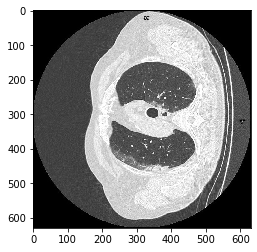

In [15]:
#(w  , h  , z )
#(630, 630, 45)
plt.imshow(data[:, :, 10], cmap='gray')

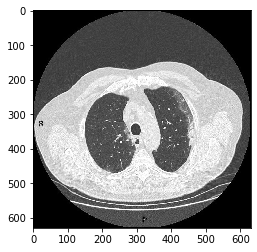

In [27]:
#np.transposeを使わずに９０°右に回転させる
#(w, h, z) → (h,w,z) or (z, h, w)

#(w  , h  , z )
# [0]  [1]  [2]
#(630, 630, 45)
# ↓
#(h  , w  , z )
# [0]  [1]  [2]
#(630, 630, 45)

#np.rollaxis()
#axis: 要素を指定する
#start: axisで指定した要素をどこから始めるか(デフォルトは0)
data_rolled = np.rollaxis(data, axis=1)
plt.imshow(data_rolled[:, :, 10], cmap='gray')

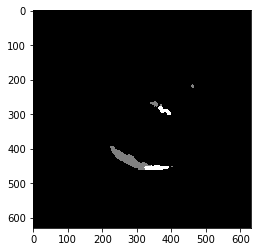

In [40]:
sample_path = df['FilePathMask'].iloc[0]
nifti = nib.load(sample_path)
data = nifti.get_fdata()
plt.imshow(data[:, :, 10], cmap='gray')

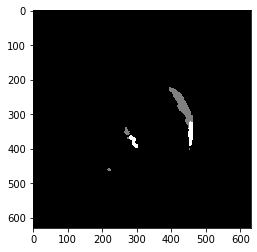

In [3]:
#load_nifti(作成した関数)をコールして、NIfTIからNumpy Arrayを取得する
sample_path = df['FilePathMask'].iloc[0]
data_rolled = load_nifti(sample_path)
plt.imshow(data_rolled[:, :, 10], cmap='gray')

## マスクデータをRGBにする

In [5]:
p = df['FilePathMask'].iloc[0]
seg_data = load_nifti(p)
seg_data.shape

(630, 630, 45)

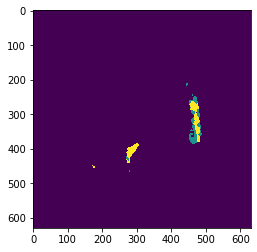

In [13]:
#色はMatplotlibが勝手につけている
plt.imshow(seg_data[:, :, 20])

In [14]:
np.unique(seg_data[:, :, 20])

array([0., 1., 2.])

In [45]:
#マスクデータをRGBにする
#1.値が全て0のRGBの箱を用意する
#2.ラベル別に値を入れる

#1.値が全て0のRGBの箱を用意する
shp = seg_data.shape
seg_color = np.zeros((shp[0], shp[1], shp[2], 3), dtype=np.float32)

#カラーラベルの定義
ggo_color = [255, 0, 0] #Red
consolidation_color = [0, 255, 0] #Green
effusion_color = [0, 0, 255] #Blue

In [19]:
seg_color.shape

(630, 630, 45, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


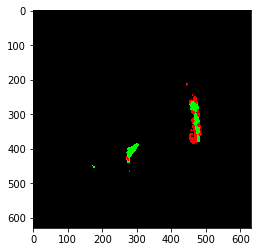

In [43]:
#seg_dataが１のところにはTrue、それ以外はFalseを入れる
filter_array = np.where(seg_data==1, True, False)

#Trueのところに赤(255,0,0)を入れる
seg_color[filter_array] = ggo_color
plt.imshow(seg_color[:, :, 20])

In [44]:
#where以外の方法(単純にTrue,Falseを入れる場合はこちらの方が綺麗)
seg_color[np.equal(seg_data, 1)] = ggo_color
seg_color[np.equal(seg_data, 2)] = consolidation_color
seg_color[np.equal(seg_data, 3)] = effusion_color

In [6]:
#まとめ: lavel_color(作成した関数)をコールしてマスクデータをRGBにする
seg_color = label_color(seg_data)

## CTデータをHUからグレイスケールにする

In [7]:
index = 0
#CTデータ取得
volume = load_nifti(df.iloc[index]['FilePathImage'])
#アノテーションマスクデータ取得
mask = load_nifti(df.iloc[index]['FilePathMask'])
#RGB変換
mask_color = label_color(mask)

In [22]:
mask_color.shape

(630, 630, 45, 3)

In [25]:
print('volume range: mix[{}] max[{}]'.format(volume.min(), volume.max()))
print('mask_color range: mix[{}] max[{}]'.format(mask_color.min(), mask_color.max()))

volume range: mix[-1414.765380859375] max[212.7372589111328]
mask_color range: mix[0.0] max[255.0]


In [42]:
#CTデータをグレイスケール(0〜255)に変換する
#1.CTデータの値を0〜1に変換する
# 1−1.全ての値について、最小値を引く
# 1-2.全ての値について、最大値で割る
#2.1を０〜２５５に変換する

maxhu = np.max(volume)
minhu = np.min(volume)

#ブロードキャストが働いてそれぞれの要素単位で計算してくれる
#最大値と最小値が同じだったら0になってしまうので、それは回避する
volume_rerange = (volume - minhu) / max((maxhu - minhu), 1e-3)
volume_rerange = volume_rerange * 255

#CTとアノテーションマスクでshapeを合わせる
volume_rerange = np.stack([volume_rerange, volume_rerange, volume_rerange], axis=-1)

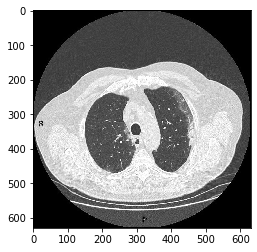

In [41]:
plt.imshow(volume_rerange[:, :, 10], cmap='gray')

In [43]:
volume_rerange.shape

(630, 630, 45, 3)

In [9]:
#まとめ: hu_to_gray(作成した関数)をコールしてCTデータをグレイスケールにする
volume_gray = hu_to_gray(volume)

## Overlay(CTデータとアノテーションの重ね合わせ)

In [20]:
a = np.array([[[150, 100, 100]]])
a.shape

(1, 1, 3)

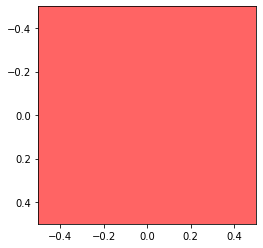

In [19]:
plt.imshow(a)

In [21]:
original = np.array([[[100, 100, 100]]])
color = np.array([[[255, 0, 0]]])

In [23]:
overlayed = (0.7*original + 0.3*color).astype(np.uint8)

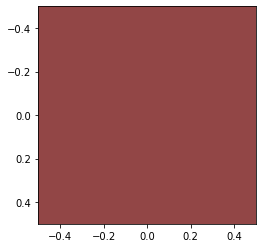

In [26]:
plt.imshow(overlayed)

In [5]:
#全部が暗くなる
overlayed = (0.7*volume_gray + 0.3*mask_color).astype(np.uint8)

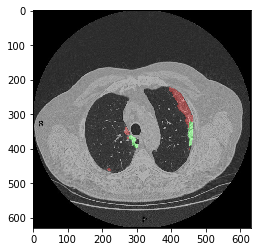

In [7]:
plt.imshow(overlayed[:, :, 10])

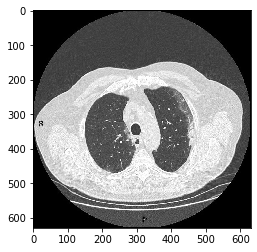

In [8]:
plt.imshow(volume_gray[:, :, 10])

In [11]:
#マスクがあるところだけ暗くする
overlayed = np.where(mask_color > 0, (0.7*volume_gray + 0.3*mask_color).astype(np.uint8), volume_gray)

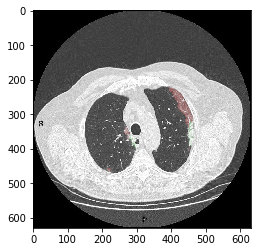

In [12]:
plt.imshow(overlayed[:, :, 10])

In [22]:
#1つのチャネルしか計算されないので、マスクの色が薄くなる
#そのチャネルにデータがある場合は、その他のチャネルの同じ箇所のデータも計算されるようにする

#元のデータをTru/Falseに変換する
mask_filter = np.greater(mask, 0)
#RGBのチャネル分stackする
mask_filter = np.stack([mask_filter, mask_filter, mask_filter], axis=-1)

In [21]:
mask_filter.shape

(630, 630, 45, 3)

In [18]:
overlayed = np.where(mask_filter > 0, (0.7*volume_gray + 0.3*mask_color).astype(np.uint8), volume_gray)

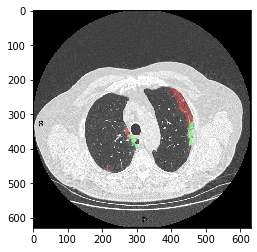

In [19]:
plt.imshow(overlayed[:, :, 10])

In [10]:
#まとめ: overlay(作成した関数)をコールして画像をオーバーレイする
overlayed= overlay(volume_gray, mask, mask_color, alpha=0.5)

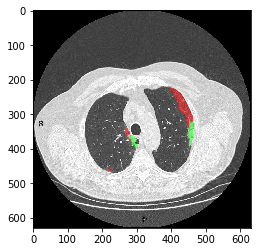

In [41]:
plt.imshow(overlayed[:, :, 10])

## 各スライスのアノテーションを一覧で表示する

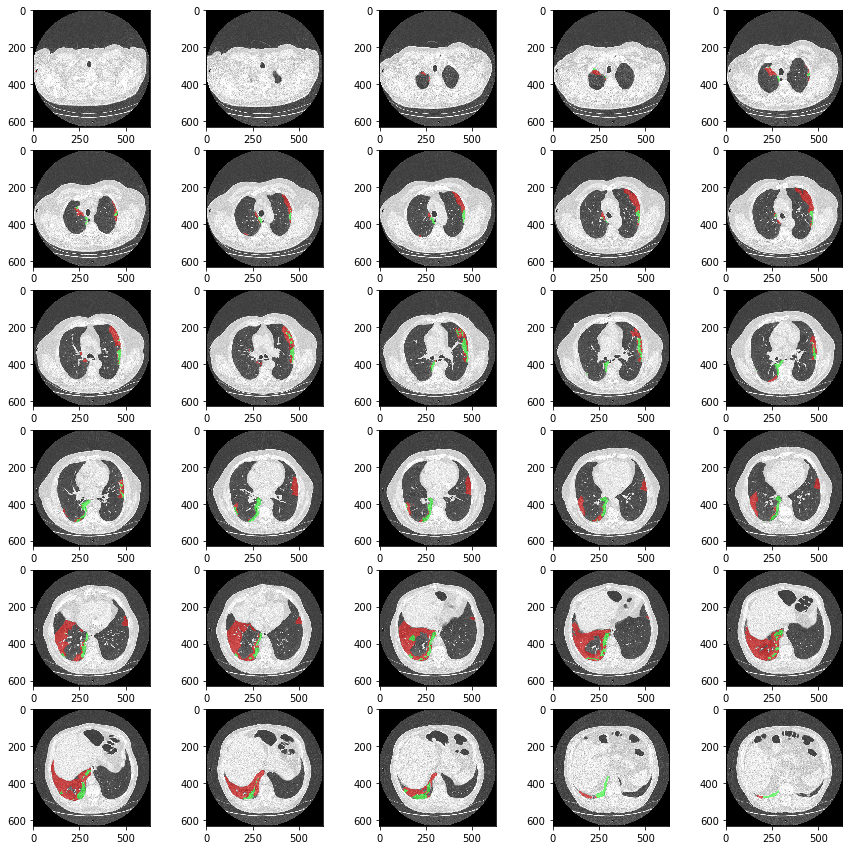

In [52]:
#グリッドに画像を入れる
cols = 5
display_num = 30
rows = (display_num - 1) // cols + 1
total_num = overlayed.shape[-2] #(630, 630, 45, 3)の"45"
interval = total_num / display_num
if interval < 1:
    interval = 1 #display_numがtotaol_numより大きい場合の処置
figsize = (15, 15)
fig, ax = plt.subplots(rows, cols, figsize=figsize)

for i in range(display_num):
    row_i = i // cols
    cols_i = i % cols
    idx = int(i * interval)
    if idx >= total_num:
        break
    ax[row_i, cols_i].imshow(overlayed[:, :, idx])


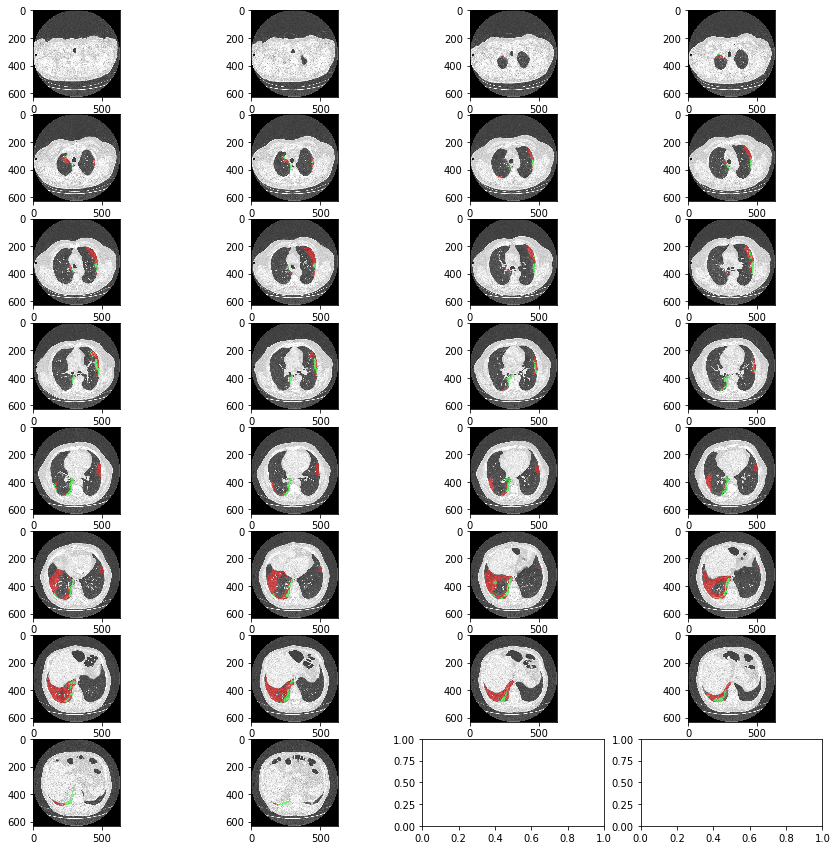

In [11]:
#まとめ: vis_overlay(作成した関数)をコールして画像を一覧表示する
vis_overlay(overlayed, cols=4, display_num=30)

## 各plotに情報を表示する

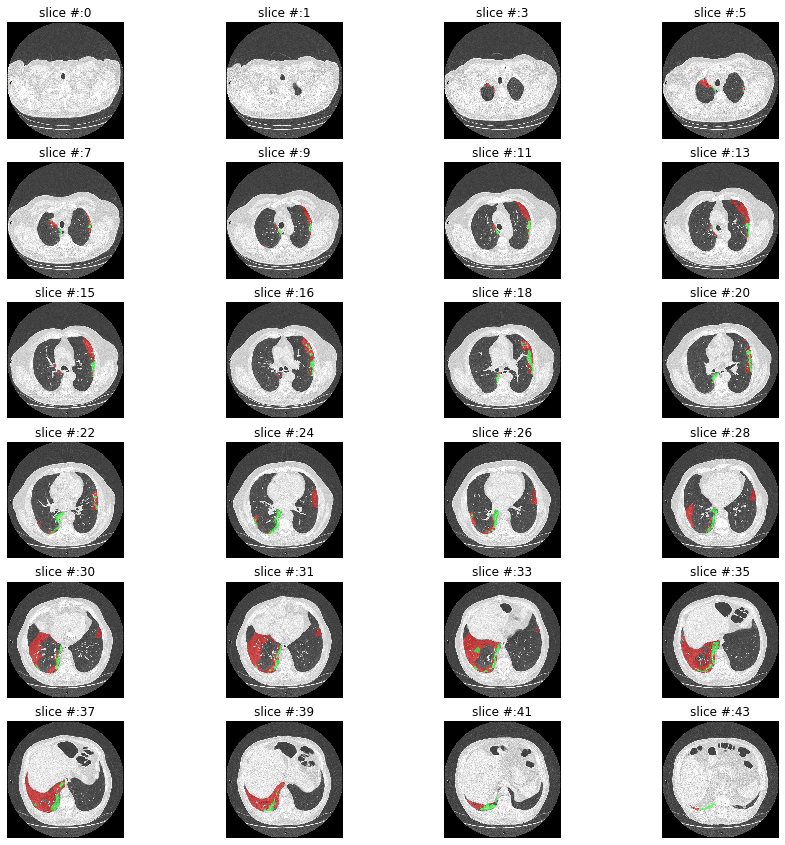

In [16]:
# 1.スライス番号(index)の表示
#2.各ラベルのHUの統計量を表示
#3.軸を非表示
vis_overlay(overlayed, cols=4, display_num=24)

### HUの統計量を表示

In [31]:
label_dict = {1: 'ggo', 2: 'consolidation', 3: 'effusion'}
result = {} #結果格納用ディクショナリ
for label in label_dict.keys():
    prefix = label_dict[label] #label_dictのvalueが入る
    #アノテーションデータが1のところにTrue、それ以外にFalseを入れる
    #roi: region of interest
    roi_hu = volume[np.equal(mask, label)]
    result[prefix + '_mean'] = np.mean(roi_hu)
    result[prefix + '_std'] = np.std(roi_hu)

In [30]:
result

{'ggo_mean': -553.040983965225,
 'ggo_std': 171.02280861310823,
 'consolidation_mean': -201.4915341831564,
 'consolidation_std': 227.0837774774284,
 'effusion_mean': nan,
 'effusion_std': nan}

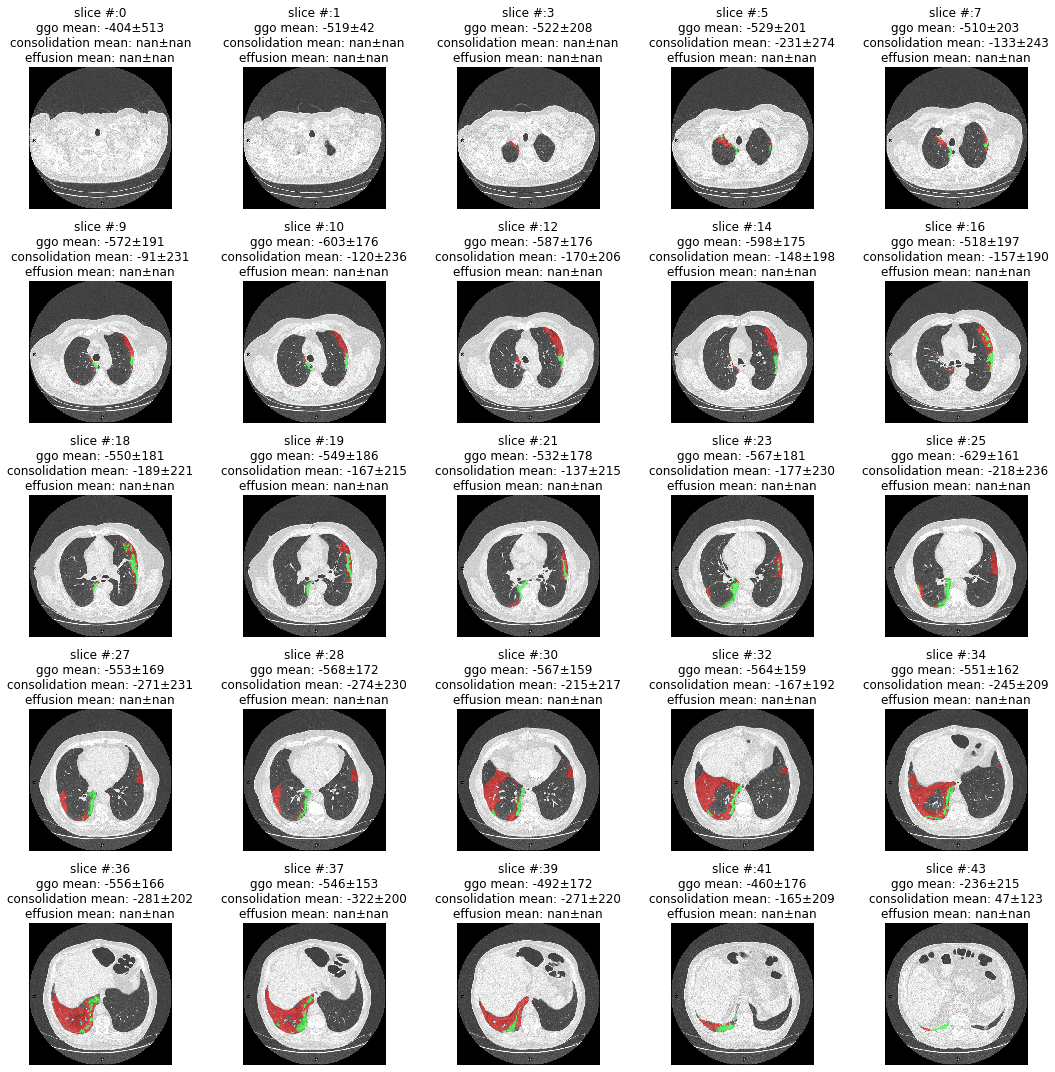

In [39]:
#まとめ
vis_overlay(overlayed, volume, mask, cols=5, display_num=25)